# Proyek Analisis Data: Bike Sharing Dataset
- **Email:** sulistiani3399@gmail.com
- **ID Dicoding:** hiitslizeu


## Menentukan Pertanyaan Bisnis

- Faktor apa saja yang dapat memengaruhi peminjaman sepeda perhari?
- Faktor apa saja yang dapat memengaruhi peminjaman sepeda perjam?

## Import Semua Packages/Library yang Digunakan

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

## Data Wrangling

### Gathering Data

In [20]:
df_day = pd.read_csv("day.csv", delimiter=",")
df_hour = pd.read_csv("hour.csv", delimiter=",")

print(df_day.shape)
df_day.head()

print(df_hour.shape)
df_hour.head()

(731, 16)
(17379, 17)


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Faktor cuaca dapat memengaruhi penggunaan sepeda (weathersit, temp, hum, windspeed)
- Dapat membangun model prediksi (season, weathersit, temp, hum, wi
- Dataset terdiri dari data harian (`df_day`) dan data per jam (`df_hour`).ndspeed, holiday, workingday, hr, cnt)

### Assessing Data

In [21]:
df_day.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [22]:
df_hour.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [23]:
df_day.duplicated().sum()
df_hour.duplicated().sum()

0

**Insight:**
- Kedua dataset tidak memiliki missing value
- Kedua dataset tidak memiliki data yang duplikat
- Data siap untuk analisis dan dilakukan pemodelan

### Cleaning Data

In [24]:
print(df_day[(df_day['temp'] < 0) | (df_day['temp'] > 1)])
print(df_hour[(df_hour['temp'] < 0) | (df_hour['temp'] > 1)])

df_day = df_day[(df_day['temp'] >= 0) & (df_day['temp'] <= 1)]
df_hour = df_hour[(df_hour['temp'] >= 0) & (df_hour['temp'] <= 1)]

Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []
Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, hr, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []


In [25]:
df_day['dteday'] = pd.to_datetime(df_day['dteday'])
df_hour['dteday'] = pd.to_datetime(df_hour['dteday'])

df_day['season'] = df_day['season'].astype('category')
df_hour['season'] = df_hour['season'].astype('category')

In [26]:
scaler = MinMaxScaler()
df_day[['temp', 'hum', 'windspeed']] = scaler.fit_transform(df_day[['temp', 'hum', 'windspeed']])
df_hour[['temp', 'hum', 'windspeed']] = scaler.fit_transform(df_hour[['temp', 'hum', 'windspeed']])

**Insight:**
- Data pada kolom temp sudah konsisten dan valid
- Kolom dteday (tanggal) sekarang dalam format yang benar (datetime)
- Kolom season sekarang menjadi data kategorikal, sehingga lebih efisien untuk analisis dan visualisasi

## Exploratory Data Analysis (EDA)

### Explore ...

In [27]:
print(df_day.describe())
print(df_hour.describe())

          instant               dteday          yr        mnth     holiday  \
count  731.000000                  731  731.000000  731.000000  731.000000   
mean   366.000000  2012-01-01 00:00:00    0.500684    6.519836    0.028728   
min      1.000000  2011-01-01 00:00:00    0.000000    1.000000    0.000000   
25%    183.500000  2011-07-02 12:00:00    0.000000    4.000000    0.000000   
50%    366.000000  2012-01-01 00:00:00    1.000000    7.000000    0.000000   
75%    548.500000  2012-07-01 12:00:00    1.000000   10.000000    0.000000   
max    731.000000  2012-12-31 00:00:00    1.000000   12.000000    1.000000   
std    211.165812                  NaN    0.500342    3.451913    0.167155   

          weekday  workingday  weathersit        temp       atemp         hum  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     2.997264    0.683995    1.395349    0.543594    0.474354    0.645649   
min      0.000000    0.000000    1.000000    0.000000 

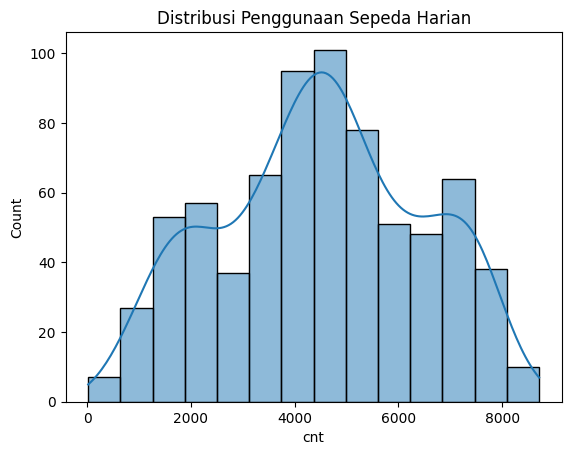

In [28]:
sns.histplot(df_day['cnt'], kde=True)
plt.title('Distribusi Penggunaan Sepeda Harian')
plt.show()

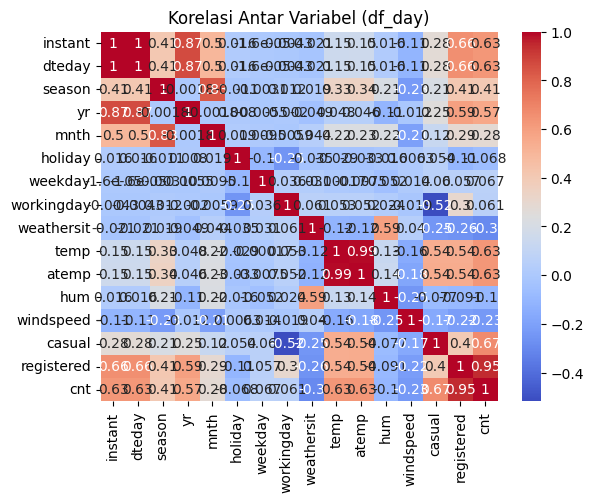

In [29]:
sns.heatmap(df_day.corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi Antar Variabel (df_day)')
plt.show()

In [30]:
print(df_day['season'].value_counts())
print(df_hour['weathersit'].value_counts())

season
3    188
2    184
1    181
4    178
Name: count, dtype: int64
weathersit
1    11413
2     4544
3     1419
4        3
Name: count, dtype: int64


**Insight:**
- Penggunaan sepeda pada musim gugur dan musim panas kemungkinan lebih tinggi daripada musim lainnya.
- Penggunaan sepeda lebih banyak saat cuaca cerah

## Visualization & Explanatory Analysis

### Pertanyaan 1:

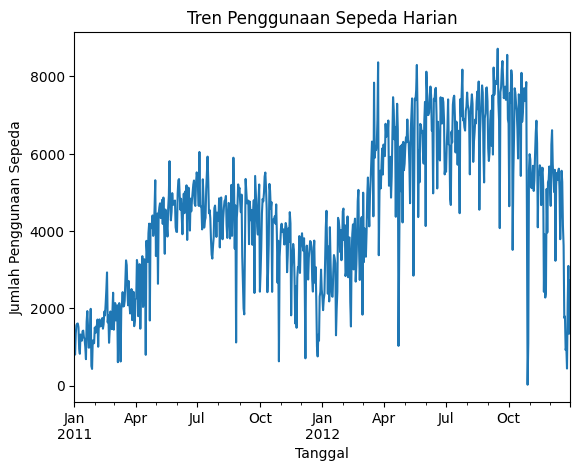

In [31]:
# Tren harian

df_day.set_index('dteday')['cnt'].plot()
plt.title('Tren Penggunaan Sepeda Harian')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Penggunaan Sepeda')
plt.show()

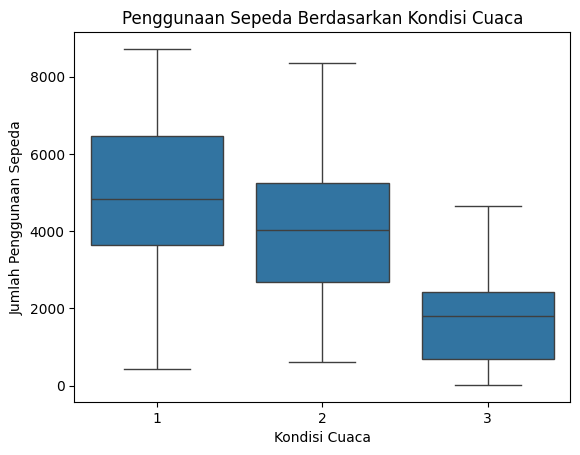

In [32]:
# Pengaruh cuasa

sns.boxplot(x='weathersit', y='cnt', data=df_day)
plt.title('Penggunaan Sepeda Berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Penggunaan Sepeda')
plt.show()

### Pertanyaan 2:

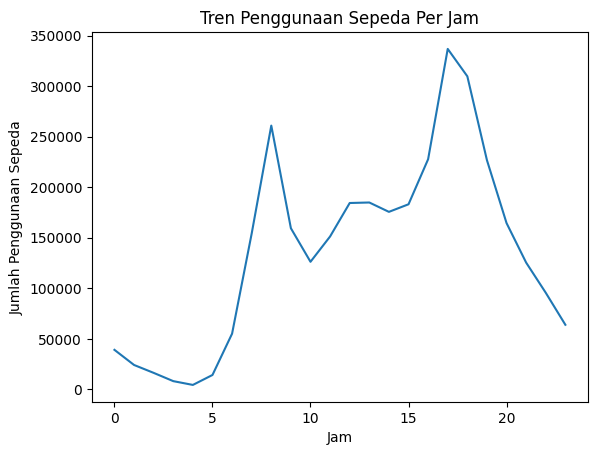

In [33]:
# Tren setiap jam

df_hour.groupby('hr')['cnt'].sum().plot()
plt.title('Tren Penggunaan Sepeda Per Jam')
plt.xlabel('Jam')
plt.ylabel('Jumlah Penggunaan Sepeda')
plt.show()

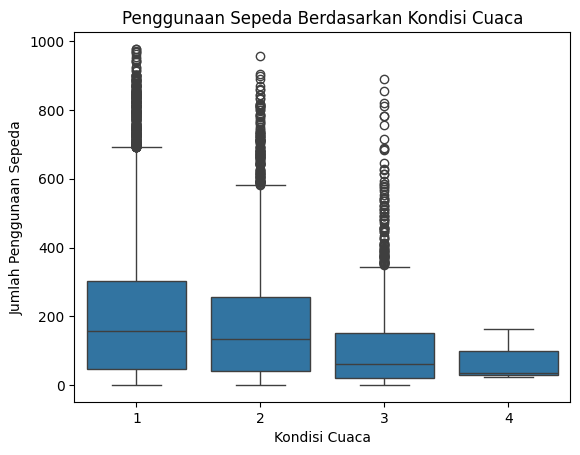

In [34]:
# Pengaruh cuasa

sns.boxplot(x='weathersit', y='cnt', data=df_hour)
plt.title('Penggunaan Sepeda Berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Penggunaan Sepeda')
plt.show()

**Insight:**
- Peminjaman sepeda cenderung lebih tinggi saat cuaca yang cerah (baik dalam hari maupun jam)
- Peminjaman sepeda lebih banyak saat hari kerja
- peminjaman sepeda bulanan lebih banyak dan stabil dari bulan april sampai oktober
- Kebanyakan orang meminjam jam 7 pagi dan jam 5 sore hari

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1:
Penggunaan sepeda tertinggi terjadi pada musim panas dan musim gugur (april-oktober). Hal ini dipengaruhi oleh faktor cuaca yang lebih nyaman untuk bersepeda pada musim tersebut. Alangkah baiknya pihak jasa peminjaman memikirkan cara untuk mengatasi masalah kekurangan sepeda saat bulan-bulan tersebut
- Conclution pertanyaan 2:
Berdasarkan analisis penggunaan sepeda tertinggi ada pada pagi dan sore hari. Maka alangkah baiknya jasa peminjaman memikirkan cara yang baik untuk mengatasi jika terjadi masalah kekurangan sepeda pinjaman.

- Rekomendasi: Sebaiknya jasa peminjaman menambah stok pada saat musim panas dan musim gugur. Mulai dari bulan Maret sebaiknya perusahaan sudah menyiapkan stok sepeda untuk dipinjamnya.
Untuk meramaikan bisnis bisa juga melakukan promosi dikala cuaca cerah. Jasa peminjaman dapat juga memberikan program keanggotaaan dengan beberapa benefit untuk pengguna yang mendaftar.
